In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize as optim

In [4]:
dataset_1 = np.array(pd.read_csv("../data/GRGDS_tilt_1.hkl"))
dataset_2 = np.array(pd.read_csv("../data/GRGDS_tilt_3.hkl"))

In [5]:
dataset_1_hkl = set([tuple(dataset_1[item,:3].astype(np.int)) for item in range(dataset_1.shape[0])])
dataset_2_hkl = set([tuple(dataset_2[item,:3].astype(np.int)) for item in range(dataset_2.shape[0])])

<ipython-input-5-a6d17d53e8d4>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset_1_hkl = set([tuple(dataset_1[item,:3].astype(np.int)) for item in range(dataset_1.shape[0])])
<ipython-input-5-a6d17d53e8d4>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note

In [6]:
intersection = list(dataset_1_hkl.intersection(dataset_2_hkl))

In [7]:
def find_index_by_hkl(hkl_tuple, dataset):
    for i in range(dataset.shape[0]):
        if (dataset[i,:3].astype(int) == hkl_tuple).all():
            return i

In [8]:
dataset_1_index = list()
dataset_2_index = list()
for hkl_tuple in intersection:
    dataset_1_index.append(find_index_by_hkl(hkl_tuple=hkl_tuple, dataset=dataset_1))
    dataset_2_index.append(find_index_by_hkl(hkl_tuple=hkl_tuple, dataset=dataset_2))
dataset_1_index = np.array(dataset_1_index)
dataset_2_index = np.array(dataset_2_index)


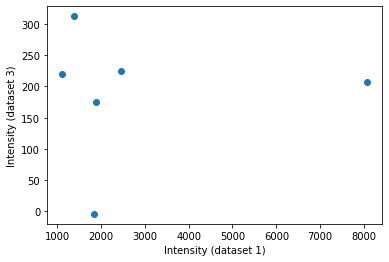

In [9]:
plt.scatter(dataset_1[dataset_1_index,3], dataset_2[dataset_2_index, 3])
plt.xlabel("Intensity (dataset 1)")
plt.ylabel("Intensity (dataset 3)")
plt.show()

In [50]:
X = dataset_1[dataset_1_index,3] 
y_hat = dataset_2[dataset_2_index, 3]

def func(params):
    return np.sum((y_hat - (params[0] + params[1]*X))**2)

In [51]:
result = optim.minimize(method="BFGS", fun=func, x0=np.array([100,0.1]))
print(result)

      fun: 55145.51499285833
 hess_inv: array([[ 1.96961801e-01, -4.06550972e-05],
       [-4.06550972e-05,  1.45464581e-08]])
      jac: array([0.        , 0.00097656])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 119
      nit: 3
     njev: 36
   status: 2
  success: False
        x: array([1.84845182e+02, 1.58764049e-03])


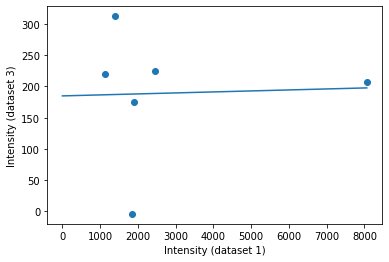

In [52]:
plt.scatter(X, y_hat)
plt.plot(np.linspace(0,max(X),100),result.x[0]+result.x[1]*np.linspace(0,max(X),100))
plt.xlabel("Intensity (dataset 1)")
plt.ylabel("Intensity (dataset 3)")
plt.show()